### COVID-19 EXPLORATORY DATA ANALYSIS #
#### Code by Diedre Brown, diedre@diedrebrown.com #

#### AIM:
#### This is an exploratory data analysis to understand the John Hopkins's dataset  on COVID-19 at 
#### https://github.com/CSSEGISandData/COVID-19

### IMPORT MODULES

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# layout to a colorblind friendly palette
plt.style.use("seaborn-colorblind")

### IMPORT DATA

In [4]:
confirmed_g = pd.read_csv("../data/time_series_covid19_confirmed_global.csv")
confirmed_g.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,701,726,730,769,769,769,813,813,813,848
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,2098728,2104197,2107365,2112023,2118676,2126531,2133963,2141854,2146714,2149636
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,171510,171793,172058,172216,172456,172816,173307,173749,174257,174679
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,118,118,118,118,120,120,120,120,122,122
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5172,5177,5180,5183,5189,5193,5205,5207,5209,5210


Let's check the shape of the dataframe

In [5]:
confirmed_g.shape

(274, 415)

I'm not concerned with the Lat and Long at the moment so let's remove them.

In [6]:
conf_g_df = confirmed_g.drop(["Lat", "Long"], axis=1)
conf_g_df.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847
1,NaN,Albania,0,0,0,0,0,0,0,0,...,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042
4,NaN,Angola,0,0,0,0,0,0,0,0,...,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,701,726,730,769,769,769,813,813,813,848
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,2098728,2104197,2107365,2112023,2118676,2126531,2133963,2141854,2146714,2149636
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,171510,171793,172058,172216,172456,172816,173307,173749,174257,174679
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,118,118,118,118,120,120,120,120,122,122
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,5172,5177,5180,5183,5189,5193,5205,5207,5209,5210


Let's aggregate the rows by country

In [8]:
conf_g_df_agg = conf_g_df.groupby("Country/Region").sum()
conf_g_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847
Albania,0,0,0,0,0,0,0,0,0,0,...,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897
Algeria,0,0,0,0,0,0,0,0,0,0,...,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234
Andorra,0,0,0,0,0,0,0,0,0,0,...,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042
Angola,0,0,0,0,0,0,0,0,0,0,...,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086


In [9]:
conf_g_df_agg.shape

(192, 411)

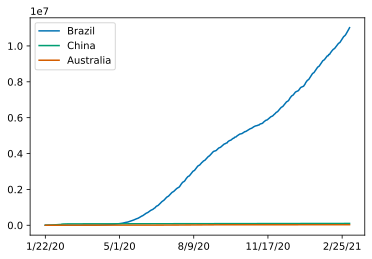

In [13]:
conf_g_df_agg.loc["Brazil"].plot()
conf_g_df_agg.loc["China"].plot()
conf_g_df_agg.loc["Australia"].plot()
plt.legend()
plt.savefig("../images/brazilconf.png")

### Calculate a good measure
Find a good measure represented as a number, describing the spread of the virus in a country

<AxesSubplot:>

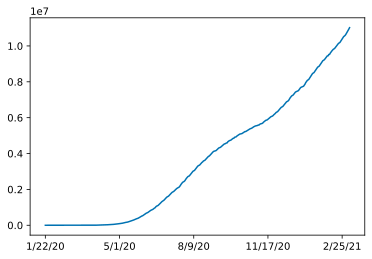

In [14]:
conf_g_df_agg.loc["Brazil"].plot()

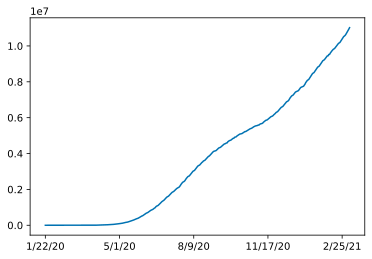

In [17]:
conf_g_df_agg.loc["Brazil"][:].plot()
plt.savefig("../images/brazilconf-2.png")

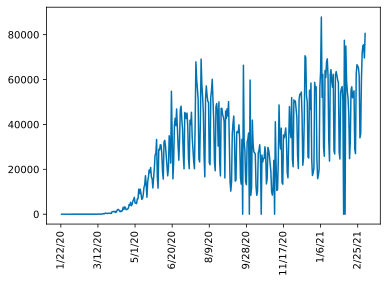

In [20]:
# calculate the first derivative of the curve
brazil_diff = conf_g_df_agg.loc["Brazil"].diff().plot()
brazil_diff.set_xticklabels(brazil_diff.get_xticklabels(), rotation=90)
plt.savefig("../images/brazilconf-diff.png")

In [21]:
# find the maxmimum infection rate for Brazil
conf_g_df_agg.loc["Brazil"].diff().max()

87843.0

In [24]:
# find the maximum infection rate for all the countries
countries = list(conf_g_df_agg.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(conf_g_df_agg.loc[c].diff().max())
conf_g_df_agg["max_infection_rate"] = max_infection_rates

In [25]:
conf_g_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,55707,55714,55733,55759,55770,55775,55827,55840,55847,1485.0
Albania,0,0,0,0,0,0,0,0,0,0,...,106215,107167,107931,108823,109674,110521,111301,112078,112897,1239.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,112960,113092,113255,113430,113593,113761,113948,114104,114234,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,10849,10866,10889,10908,10948,10976,10998,11019,11042,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,20782,20807,20854,20882,20923,20981,21026,21055,21086,355.0


In [26]:
# new df with infection rate column
corona_inf_df = pd.DataFrame(conf_g_df_agg["max_infection_rate"])
corona_inf_df.head()

,max_infection_rate
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,355.0
